In [1]:
# load libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [67]:

# load data

df_500greatest = pd.read_csv('datasets/rollingstones_500_greatest_albums.csv', encoding = "unicode_escape")
df_discogs = pd.read_csv('datasets/all_release_data_most_collected_08052022_1200.csv')
df_discogs_most_wanted = pd.read_csv('datasets/all_release_data_most_wanted_9799.csv')
df_p4k_spotify = pd.read_csv('datasets/p4kXspotify.csv', encoding = "unicode_escape")

print("datasets loaded")

datasets loaded


In [68]:
df_discogs.head()

,Unnamed: 0,artist,title,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest
0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0.0,53521.0,18838.0,4.56,6337.0,€45.00,€21.11,€189.99
1,1,Kendrick Lamar,"Good Kid, M.A.A.d City",https://www.discogs.com/release/3975953-Kendri...,2012,2012-10-22,['Hip Hop'],['Conscious'],US,"[['2 x vinyl', 'lp', 'album', 'deluxe edition']]",1,0,0,0,0,0,0,1,0,0.0,41176.0,12493.0,4.66,2957.0,€20.90,€13.29,€35.76
2,2,Michael Jackson,Thriller,https://www.discogs.com/release/2911293-Michae...,1982,1982-11-30,"['Funk / Soul', 'Pop']","['Contemporary R&B', 'Disco', 'Soul']",US,"[['vinyl', 'lp', 'album', 'stereo', 'pitman pr...",1,0,0,0,0,0,0,2,1,1.0,40452.0,9254.0,4.48,2744.0,€15.06,€4.53,€99.99
3,3,Pink Floyd,The Dark Side Of The Moon,https://www.discogs.com/release/9287809-Pink-F...,2016,2016-11-04,['Rock'],"['Prog Rock', 'Psychedelic Rock', 'Classic Rock']",Europe,"[['vinyl', 'lp', 'album', 'reissue', 'remaster...",2,0,0,0,0,0,0,2,1,0.0,38314.0,3961.0,4.83,4201.0,€23.62,€19.90,€33.25
4,4,Fleetwood Mac,Rumours,https://www.discogs.com/release/526351-Fleetwo...,1977,1977,['Rock'],"['Soft Rock', 'Classic Rock']",US,"[['vinyl', 'lp', 'album', 'los angeles pressin...",1,0,0,0,0,0,0,1,0,1.0,35108.0,8351.0,4.50,2713.0,€21.84,€2.85,€189.05


In [69]:
df_discogs_most_wanted.head()

,Unnamed: 0,artist,title,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest
0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0.0,53521.0,18838.0,4.56,6337.0,€45.00,€21.11,€189.99
1,1,Kanye West,My Beautiful Dark Twisted Fantasy,https://www.discogs.com/release/2606952-Kanye-...,Nov 2010,2010-11,['Hip Hop'],"['Contemporary R&B', 'Pop Rap']",US,"[['3 x vinyl', 'lp', 'album', 'limited edition']]",1,1,0,0,0,0,0,1,0,0.0,25052.0,14112.0,4.58,2084.0,€77.83,€28.30,€175.00
2,2,Daft Punk,Discovery,https://www.discogs.com/release/2879-Daft-Punk...,2001,2001-03-12,['Electronic'],"['House', 'Disco']",Europe,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0.0,21065.0,13567.0,4.6,2845.0,€131.48,€16.98,€350.00
3,3,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),https://www.discogs.com/release/153749-Wu-Tang...,1993,1993-11-09,['Hip Hop'],"['Hardcore Hip-Hop', 'Boom Bap']",US,"[['vinyl', 'lp', 'album', 'stereo']]",1,0,0,0,0,0,0,2,0,0.0,20201.0,13245.0,4.69,2259.0,€92.99,€15.04,€475.00
4,4,Doom,Madvillainy,https://www.discogs.com/release/242785-Doom-An...,2004,2004-03-19,['Hip Hop'],"['Jazzy Hip-Hop', 'Experimental', 'Leftfield']",US,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0.0,19881.0,13137.0,4.72,2177.0,€76.00,€18.90,€166.25


In [70]:
df_discogs.isnull().sum()

Unnamed: 0         0
artist             0
title              0
url                0
year             151
date             151
genres             5
styles             5
countries         75
formats            5
issue_type         0
limited            0
picture_disc       0
box_set            0
numbered           0
test_pressing      0
promo              0
channels           0
gatefold           0
colored            5
haves              5
wants              5
avg_rating         5
num_ratings        5
price_median       5
price_lowest       5
price_highest      5
dtype: int64

In [71]:
df_discogs_most_wanted.isnull().sum()

Unnamed: 0         0
artist             0
title              0
url                0
year             276
date             276
genres             2
styles             2
countries         62
formats            2
issue_type         0
limited            0
picture_disc       0
box_set            0
numbered           0
test_pressing      0
promo              0
channels           0
gatefold           0
colored            2
haves              2
wants              2
avg_rating         2
num_ratings        2
price_median       2
price_lowest       2
price_highest      2
dtype: int64

In [72]:
df_discogs = df_discogs.dropna()

In [73]:
df_discogs_most_wanted = df_discogs_most_wanted.dropna()

In [76]:
#convert price columns to float
df_discogs[df_discogs.columns[-3:]] = df_discogs[df_discogs.columns[-3:]].replace('[\€,]', '', regex=True)

df_discogs[df_discogs.columns[-3:]]

ValueError: could not convert string to float: '--'

In [74]:
#convert price columns to float
df_discogs_most_wanted[df_discogs_most_wanted.columns[-3:]] = df_discogs_most_wanted[df_discogs_most_wanted.columns[-3:]].replace('[\€,]', '', regex=True)

df_discogs_most_wanted[df_discogs_most_wanted.columns[-3:]]

,price_median,price_lowest,price_highest
0,45.00,21.11,189.99
1,77.83,28.30,175.00
2,131.48,16.98,350.00
3,92.99,15.04,475.00
4,76.00,18.90,166.25
...,...,...,...
9794,33.23,16.14,76.00
9795,93.83,47.49,179.99
9796,47.49,24.70,68.40
9797,375.25,331.55,522.50


In [75]:
df_discogs.describe()

,Unnamed: 0,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings
count,9782.000000,9782.000000,9782.000000,9782.000000,9782.0,9782.000000,9782.0,9782.000000,9782.000000,9782.000000,9782.000000,9782.000000,9782.000000,9782.000000,9782.000000
mean,4989.994991,1.233490,0.060213,0.003782,0.0,0.004396,0.0,0.000818,1.282253,0.156205,0.384993,4446.289818,860.442036,4.264097,339.589450
std,2887.499733,0.423073,0.237893,0.061388,0.0,0.066159,0.0,0.028587,0.450119,0.363068,0.486618,2986.613578,1068.226064,0.327772,261.161772
min,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,2288.000000,18.000000,3.070000,35.000000
25%,2484.250000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,2730.000000,257.000000,4.020000,198.000000
50%,4990.500000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,3423.500000,554.000000,4.310000,267.000000
75%,7487.750000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2.000000,0.000000,1.000000,4971.750000,1061.000000,4.540000,389.000000
max,10002.000000,2.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,2.000000,1.000000,1.000000,53521.000000,18838.000000,4.920000,6337.000000


In [77]:
df_discogs_most_wanted.describe()

,Unnamed: 0,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,num_ratings
count,9476.000000,9476.000000,9476.000000,9476.000000,9476.0,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000,9476.000000
mean,4853.959688,1.228261,0.129485,0.008020,0.0,0.022583,0.000950,0.012980,1.167581,0.120093,0.297594,2475.940692,1472.911988,232.835268
std,2826.714190,0.419734,0.335754,0.089201,0.0,0.148579,0.030805,0.113195,0.373514,0.325087,0.457224,3505.056523,933.126806,291.442493
min,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,890.000000,0.000000
25%,2390.750000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,425.000000,1002.000000,67.000000
50%,4852.500000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1194.000000,1188.000000,135.000000
75%,7283.250000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3083.500000,1553.000000,285.000000
max,9798.000000,2.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,53521.000000,18838.000000,6337.000000


In [78]:
#replace $$ at the end of artist names
df_discogs["artist"] = df_discogs["artist"].replace('[\$$,]', '', regex=True)

df_discogs["artist"]

0                 Daft Punk
1            Kendrick Lamar
2           Michael Jackson
3                Pink Floyd
4             Fleetwood Mac
                ...        
9998           Minor Threat
9999            Carole King
10000             Tom Jones
10001                Pixies
10002    Lin-Manuel Miranda
Name: artist, Length: 9782, dtype: object

In [79]:
#replace $$ at the end of artist names
df_discogs_most_wanted["artist"] = df_discogs_most_wanted["artist"].replace('[\$$,]', '', regex=True)

df_discogs_most_wanted["artist"]

0          Daft Punk
1         Kanye West
2          Daft Punk
3       Wu-Tang Clan
4               Doom
            ...     
9794      M.I.A. (2)
9795       Kate Bush
9796     Donald Byrd
9797        Joy (46)
9798    The Cult (4)
Name: artist, Length: 9476, dtype: object

In [80]:
df_discogs["price_median"] = pd.to_numeric(df_discogs["price_median"], errors='coerce')

In [81]:
df_discogs_most_wanted["price_median"] = pd.to_numeric(df_discogs_most_wanted["price_median"], errors='coerce')

In [82]:
#check for NA
df_discogs["price_median"].isnull().sum()

13

In [83]:
#check for NA
df_discogs_most_wanted["price_median"].isnull().sum()

186

In [84]:
df_discogs = df_discogs.dropna()
df_discogs_most_wanted = df_discogs_most_wanted.dropna()

In [85]:
df_discogs["price_median"] = df_discogs["price_median"].astype(float)

In [86]:
df_discogs_most_wanted["price_median"] = df_discogs_most_wanted["price_median"].astype(float)

In [87]:
df_discogs.describe()

,Unnamed: 0,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median
count,9769.000000,9769.000000,9769.000000,9769.000000,9769.0,9769.000000,9769.0,9769.000000,9769.000000,9769.000000,9769.000000,9769.000000,9769.000000,9769.000000,9769.000000,9769.000000
mean,4986.476405,1.232982,0.059781,0.003787,0.0,0.004402,0.0,0.000819,1.282424,0.156311,0.384891,4448.465861,859.754427,4.263793,339.704371,24.172994
std,2886.804800,0.422752,0.237093,0.061429,0.0,0.066202,0.0,0.028606,0.450202,0.363168,0.486594,2987.927507,1068.269100,0.327825,261.289809,35.779853
min,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,2288.000000,18.000000,3.070000,35.000000,0.950000
25%,2481.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,2731.000000,257.000000,4.020000,198.000000,8.080000
50%,4986.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,3425.000000,554.000000,4.310000,267.000000,19.000000
75%,7483.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2.000000,0.000000,1.000000,4975.000000,1061.000000,4.540000,389.000000,28.030000
max,10002.000000,2.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,2.000000,1.000000,1.000000,53521.000000,18838.000000,4.920000,6337.000000,1462.500000


In [88]:
df_discogs_most_wanted.describe()

,Unnamed: 0,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,num_ratings,price_median
count,9290.000000,9290.000000,9290.000000,9290.000000,9290.0,9290.000000,9290.000000,9290.000000,9290.000000,9290.000000,9290.000000,9290.000000,9290.000000,9290.000000,9290.000000
mean,4828.653068,1.226372,0.125081,0.007320,0.0,0.022497,0.000753,0.010657,1.169429,0.121313,0.292250,2516.831862,1478.812809,236.482777,110.110133
std,2825.703657,0.418505,0.330828,0.085246,0.0,0.148302,0.027441,0.102685,0.375151,0.326509,0.454821,3526.749713,940.031692,293.052718,231.029066
min,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,890.000000,0.000000,4.220000
25%,2360.500000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,442.000000,1004.000000,69.000000,28.500000
50%,4821.500000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1226.000000,1191.000000,138.000000,53.135000
75%,7246.500000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3139.750000,1562.000000,289.000000,114.492500
max,9798.000000,2.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,53521.000000,18838.000000,6337.000000,7019.460000


In [11]:
#df_discogs["artist"] = df_discogs["artist"].astype("category")

In [89]:
df_discogs["year"] = pd.to_numeric(df_discogs["year"], errors='coerce')
df_discogs = df_discogs.dropna()

In [90]:
df_discogs_most_wanted["year"] = pd.to_numeric(df_discogs_most_wanted["year"], errors='coerce')
df_discogs_most_wanted = df_discogs_most_wanted.dropna()

<AxesSubplot:title={'center':'price_median'}, xlabel='year'>

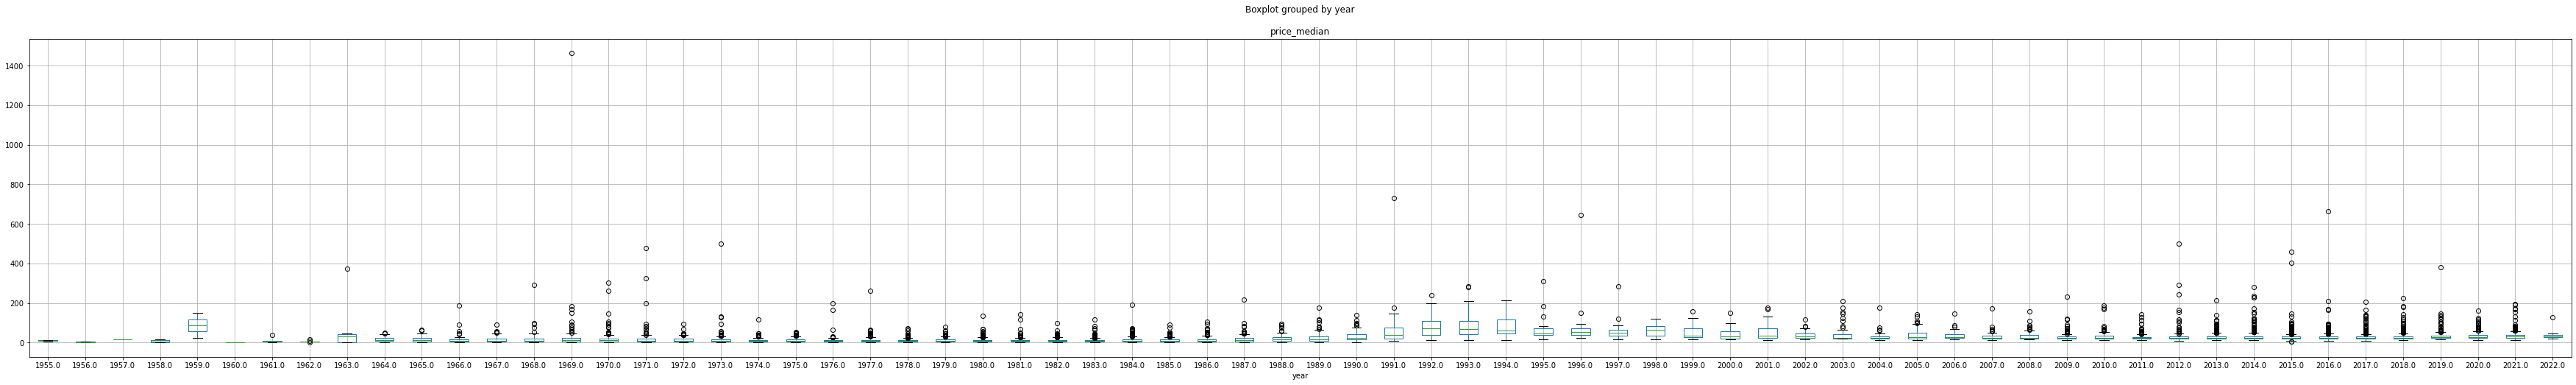

In [13]:
boxplot = df_discogs.boxplot(column=['price_median'],by="year",figsize=(60,8))
boxplot

<AxesSubplot:title={'center':'price_median'}, xlabel='year'>

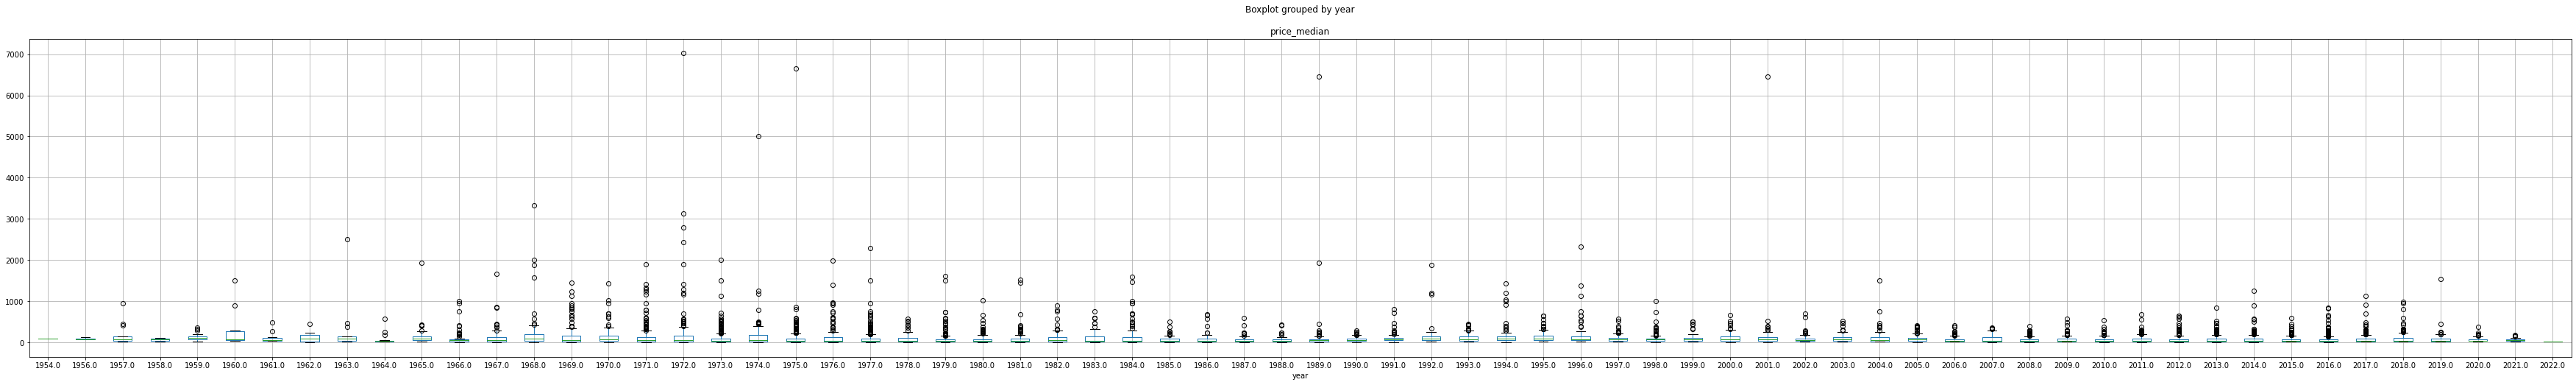

In [91]:
boxplot = df_discogs_most_wanted.boxplot(column=['price_median'],by="year",figsize=(60,8))
boxplot

In [92]:
print(df_discogs.nunique())

Unnamed: 0       8898
artist           1967
title            5400
url              8896
year               68
date             2238
genres            233
styles           2813
countries          42
formats          2597
issue_type          2
limited             2
picture_disc        2
box_set             1
numbered            2
test_pressing       1
promo               2
channels            2
gatefold            2
colored             2
haves            4093
wants            2391
avg_rating        164
num_ratings      1049
price_median     2756
price_lowest     1403
price_highest    2183
dtype: int64


In [93]:
print(df_discogs_most_wanted.nunique())

Unnamed: 0       8430
artist           2674
title            4837
url              8423
year               68
date             2265
genres            266
styles           2976
countries          80
formats          2365
issue_type          2
limited             2
picture_disc        2
box_set             1
numbered            2
test_pressing       2
promo               2
channels            2
gatefold            2
colored             2
haves            4148
wants            1942
avg_rating        139
num_ratings      1064
price_median     3502
price_lowest     1859
price_highest    2281
dtype: int64


<AxesSubplot:ylabel='Frequency'>

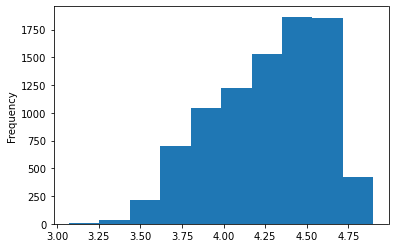

In [15]:
df_discogs["avg_rating"].plot.hist()

In [97]:
df_discogs_most_wanted["avg_rating"] = pd.to_numeric(df_discogs_most_wanted["avg_rating"], errors='coerce')

<AxesSubplot:ylabel='Frequency'>

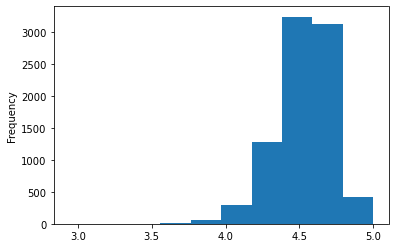

In [98]:
df_discogs_most_wanted["avg_rating"].plot.hist()

In [16]:
#ValueError: 
#Joey Bada$$
#Expected end of text, found '$'  (at char 9), (line:1, col:10)

df_discogs['artist'].str.replace(r"\$\$","SS")

/var/folders/2k/lqwk1p1108jctdxn9x58f5qm0000gn/T/ipykernel_6110/3886552184.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_discogs['artist'].str.replace(r"\$\$","SS")


0                 Daft Punk
1            Kendrick Lamar
2           Michael Jackson
3                Pink Floyd
4             Fleetwood Mac
                ...        
9998           Minor Threat
9999            Carole King
10000             Tom Jones
10001                Pixies
10002    Lin-Manuel Miranda
Name: artist, Length: 8898, dtype: object

In [99]:
#ValueError: 
#Joey Bada$$
#Expected end of text, found '$'  (at char 9), (line:1, col:10)

df_discogs_most_wanted['artist'].str.replace(r"\$\$","SS")

/var/folders/2k/lqwk1p1108jctdxn9x58f5qm0000gn/T/ipykernel_6110/2174874719.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_discogs_most_wanted['artist'].str.replace(r"\$\$","SS")


0          Daft Punk
2          Daft Punk
3       Wu-Tang Clan
4               Doom
5        Frank Ocean
            ...     
9794      M.I.A. (2)
9795       Kate Bush
9796     Donald Byrd
9797        Joy (46)
9798    The Cult (4)
Name: artist, Length: 8430, dtype: object

In [17]:
df_discogs['artist'].value_counts()[0:10]

The Beatles     175
Various         167
Pink Floyd      147
David Bowie     110
Led Zeppelin     97
Queen            75
Iron Maiden      70
Bob Dylan        67
AC/DC            65
Neil Young       60
Name: artist, dtype: int64

In [100]:
df_discogs_most_wanted['artist'].value_counts()[0:10]

Pink Floyd                381
Various                   169
The Beatles               168
Led Zeppelin              145
David Bowie               128
Miles Davis               108
Nirvana                    90
Black Sabbath              86
The Velvet Underground     59
Radiohead                  48
Name: artist, dtype: int64

<AxesSubplot:>

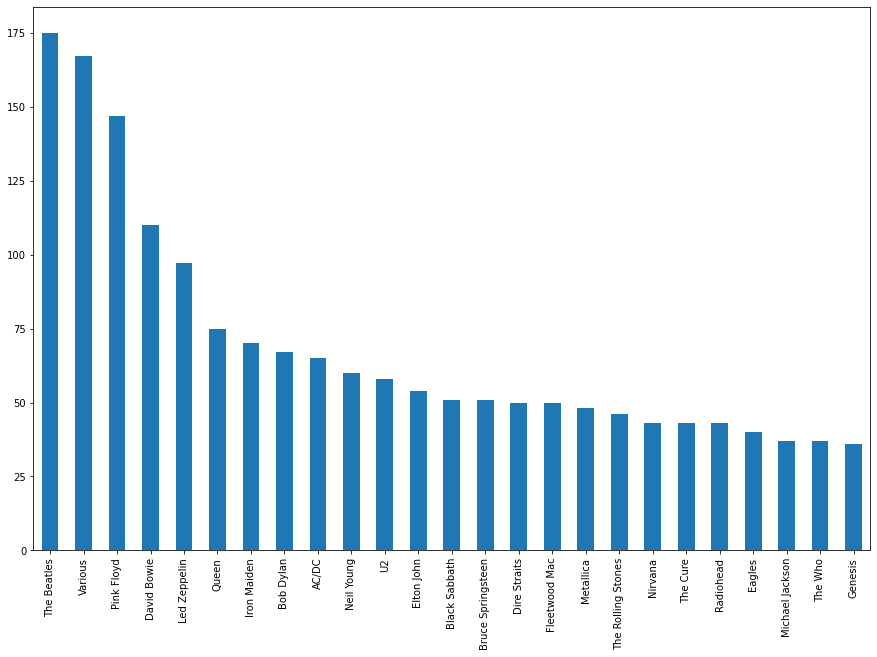

In [18]:
#number of albums by artist on most collected list, top 25
df_discogs['artist'].value_counts()[0:25].plot(kind = 'bar',figsize=(15,10))

<AxesSubplot:>

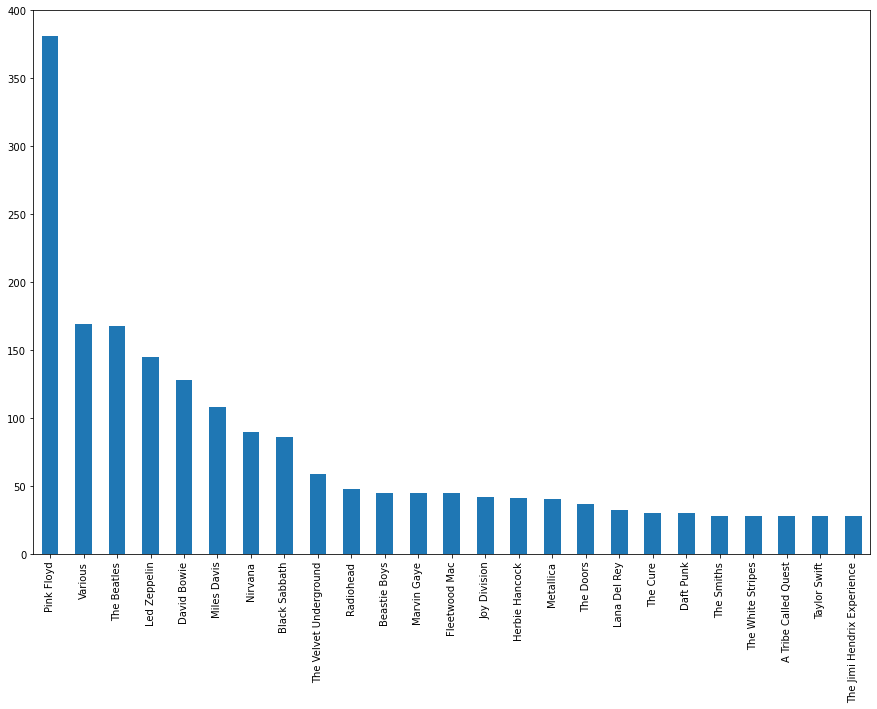

In [101]:
#number of albums by artist on most collected list, top 25
df_discogs_most_wanted['artist'].value_counts()[0:25].plot(kind = 'bar',figsize=(15,10))

In [19]:
df_discogs.dtypes

Unnamed: 0         int64
artist            object
title             object
url               object
year             float64
date              object
genres            object
styles            object
countries         object
formats           object
issue_type         int64
limited            int64
picture_disc       int64
box_set            int64
numbered           int64
test_pressing      int64
promo              int64
channels           int64
gatefold           int64
colored          float64
haves            float64
wants            float64
avg_rating       float64
num_ratings      float64
price_median     float64
price_lowest      object
price_highest     object
dtype: object

In [20]:
df_discogs[["haves","wants","num_ratings","colored","year"]] = df_discogs[["haves","wants","num_ratings","colored","year"]].astype(int)
df_discogs

,Unnamed: 0,artist,title,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest
0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99
1,1,Kendrick Lamar,"Good Kid, M.A.A.d City",https://www.discogs.com/release/3975953-Kendri...,2012,2012-10-22,['Hip Hop'],['Conscious'],US,"[['2 x vinyl', 'lp', 'album', 'deluxe edition']]",1,0,0,0,0,0,0,1,0,0,41176,12493,4.66,2957,20.90,13.29,35.76
2,2,Michael Jackson,Thriller,https://www.discogs.com/release/2911293-Michae...,1982,1982-11-30,"['Funk / Soul', 'Pop']","['Contemporary R&B', 'Disco', 'Soul']",US,"[['vinyl', 'lp', 'album', 'stereo', 'pitman pr...",1,0,0,0,0,0,0,2,1,1,40452,9254,4.48,2744,15.06,4.53,99.99
3,3,Pink Floyd,The Dark Side Of The Moon,https://www.discogs.com/release/9287809-Pink-F...,2016,2016-11-04,['Rock'],"['Prog Rock', 'Psychedelic Rock', 'Classic Rock']",Europe,"[['vinyl', 'lp', 'album', 'reissue', 'remaster...",2,0,0,0,0,0,0,2,1,0,38314,3961,4.83,4201,23.62,19.90,33.25
4,4,Fleetwood Mac,Rumours,https://www.discogs.com/release/526351-Fleetwo...,1977,1977,['Rock'],"['Soft Rock', 'Classic Rock']",US,"[['vinyl', 'lp', 'album', 'los angeles pressin...",1,0,0,0,0,0,0,1,0,1,35108,8351,4.50,2713,21.84,2.85,189.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,9998,Minor Threat,Minor Threat,https://www.discogs.com/release/1267538-Minor-...,1987,1987,['Rock'],"['Hardcore', 'Punk']",US,"[['vinyl', 'lp', 'compilation', 'repress', '$5...",2,0,0,0,0,0,0,1,0,1,2290,532,4.59,160,34.99,13.00,47.50
9999,9999,Carole King,Wrap Around Joy,https://www.discogs.com/release/1602932-Carole...,1974,1974,['Rock'],['Pop Rock'],US,"[['vinyl', 'lp', 'album', 'terre haute pressin...",1,0,0,0,0,0,0,1,0,1,2289,82,3.58,111,2.57,0.99,8.00
10000,10000,Tom Jones,This Is Tom Jones,https://www.discogs.com/release/1804019-Tom-Jo...,1969,1969,['Pop'],"['Ballad', 'Vocal']",US,"[['vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,2292,31,3.50,84,2.33,0.93,7.60
10001,10001,Pixies,Bossanova,https://www.discogs.com/release/664574-Pixies-...,1990,1990,['Rock'],['Indie Rock'],UK,"[['vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,2291,1286,4.26,185,34.50,9.00,60.00


In [102]:
df_discogs_most_wanted[["haves","wants","num_ratings","colored","year"]] = df_discogs_most_wanted[["haves","wants","num_ratings","colored","year"]].astype(int)
df_discogs_most_wanted

,Unnamed: 0,artist,title,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest
0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99
2,2,Daft Punk,Discovery,https://www.discogs.com/release/2879-Daft-Punk...,2001,2001-03-12,['Electronic'],"['House', 'Disco']",Europe,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,21065,13567,4.60,2845,131.48,16.98,350.00
3,3,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),https://www.discogs.com/release/153749-Wu-Tang...,1993,1993-11-09,['Hip Hop'],"['Hardcore Hip-Hop', 'Boom Bap']",US,"[['vinyl', 'lp', 'album', 'stereo']]",1,0,0,0,0,0,0,2,0,0,20201,13245,4.69,2259,92.99,15.04,475.00
4,4,Doom,Madvillainy,https://www.discogs.com/release/242785-Doom-An...,2004,2004-03-19,['Hip Hop'],"['Jazzy Hip-Hop', 'Experimental', 'Leftfield']",US,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,19881,13137,4.72,2177,76.00,18.90,166.25
5,5,Frank Ocean,Blond,https://www.discogs.com/release/9412062-Frank-...,2016,2016-11-25,"['Hip Hop', 'Funk / Soul', 'Pop']",['Contemporary R&B'],US,"[['2 x vinyl', 'lp', 'album', 'limited edition...",1,1,0,0,0,0,0,1,1,0,5783,12955,4.81,839,665.00,237.50,1347.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,9794,M.I.A. (2),Matangi,https://www.discogs.com/release/5126620-MIA-Ma...,2013,2013-11-25,"['Electronic', 'Hip Hop', 'Pop']",['Electroclash'],US,"[['2 x vinyl', 'lp', 'album', 'gatefold']]",1,0,0,0,0,0,0,1,1,0,1405,890,4.17,106,33.23,16.14,76.00
9795,9795,Kate Bush,Hounds Of Love,https://www.discogs.com/release/2404695-Kate-B...,2010,2010-08-16,"['Electronic', 'Rock', 'Pop']","['Pop Rock', 'Synth-pop', 'Art Rock']",US,"[['vinyl', 'lp', 'album', 'limited edition', '...",2,1,0,0,1,0,0,1,0,1,1210,890,4.64,187,93.83,47.49,179.99
9796,9796,Donald Byrd,Byrd In Flight,https://www.discogs.com/release/16836906-Donal...,2021,2021-01-08,['Jazz'],"['Hard Bop', 'Latin Jazz']",US,"[['vinyl', 'lp', 'album', 'reissue', 'stereo',...",2,0,0,0,0,0,0,2,1,0,4076,891,4.72,378,47.49,24.70,68.40
9797,9797,Joy (46),The Time Is Right,https://www.discogs.com/release/2400625-Joy-Th...,1983,1983,['Funk / Soul'],['Gospel'],US,"[['vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,41,892,4.72,50,375.25,331.55,522.50


In [21]:
df_discogs.loc[df_discogs['title'] == "Random Access Memories"]

,Unnamed: 0,artist,title,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest
0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99
561,561,Daft Punk,Random Access Memories,https://www.discogs.com/release/9216088-Daft-P...,2013,2013-05-21,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Electro', 'Synth-pop']",US,"[['2 x vinyl', 'lp', 'album', '180g']]",1,0,0,0,0,0,0,1,0,0,9367,3954,4.71,875,42.70,28.50,69.00
1106,1106,Daft Punk,Random Access Memories,https://www.discogs.com/release/10790424-Daft-...,2017,2017,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Electro', 'Synth-pop']",Europe,"[['2 x vinyl', 'lp', 'album', 'reissue', '180g']]",2,0,0,0,0,0,0,1,0,0,7164,2701,4.71,690,27.50,20.87,46.54
3218,3218,Daft Punk,Random Access Memories,https://www.discogs.com/release/17432941-Daft-...,2021,2021,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Electro', 'Synth-pop']",Europe,"[['2 x vinyl', 'lp', 'album', 'reissue', 'ster...",2,0,0,0,0,0,0,2,0,0,4343,1233,4.82,352,32.65,14.73,68.00


In [22]:
df_500greatest

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock
...,...,...,...,...,...,...
495,496,1969,Boz Scaggs,Boz Scaggs,Rock,Pop Rock
496,497,2001,White Blood Cells,The White Stripes,Rock,"Indie Rock, Alternative Rock, Blues Rock, Gara..."
497,498,1989,The Stone Roses,The Stone Roses,Rock,Indie Rock
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues


In [103]:
def findAlbuminRSDataset(album):
    if df_500greatest.loc[df_500greatest['Album'] == album].empty:
        return 0
    else:
        return 1

# create influential album column
df_discogs['influential_album'] = df_discogs['title'].apply(findAlbuminRSDataset)
df_discogs_most_wanted['influential_album'] = df_discogs_most_wanted['title'].apply(findAlbuminRSDataset)

<AxesSubplot:ylabel='Frequency'>

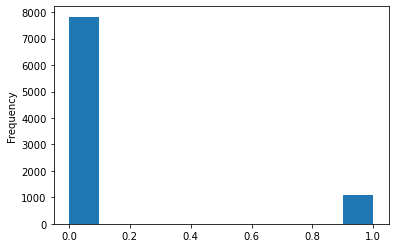

In [24]:
df_discogs["influential_album"] = df_discogs["influential_album"].astype(int)
df_discogs["influential_album"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

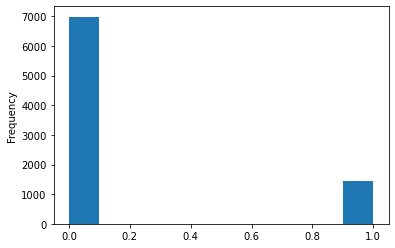

In [104]:
df_discogs_most_wanted["influential_album"] = df_discogs_most_wanted["influential_album"].astype(int)
df_discogs_most_wanted["influential_album"].plot.hist()

In [25]:
df_p4k_spotify

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18398,DJ Khaled,Father of Asahd,Rawiya Kameir,5.4,2019.0,May 22 2019,none,Rap,0.530733,0.763000,5.600000,-4.037933,0.260833,0.138597,0.000002,0.286033,0.465000,109.981200
18399,Interpol,A Fine Mess EP,Brian Josephs,5.6,2019.0,May 22 2019,none,Rock,0.481000,0.938800,2.600000,-1.761400,0.054260,0.000563,0.699800,0.202380,0.522800,124.184800
18400,Injury Reserve,Injury Reserve,Sheldon Pearce,6.8,2019.0,May 22 2019,none,Rap,0.559615,0.709538,5.769231,-6.205846,0.346485,0.182031,0.000229,0.259154,0.559154,106.885769
18401,Operators,Radiant Dawn,Stuart Berman,7.7,2019.0,May 22 2019,none,Rock,0.575929,0.693429,5.071429,-9.977714,0.058193,0.171626,0.192718,0.260207,0.417579,124.177214


In [26]:
df_p4k_spotify.loc[df_p4k_spotify['artist'] == "Pink Floyd"]

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
2383,Pink Floyd,Animals,James P. Wisdom,10.0,NaN,April 25 2000,Columbia,Rock,0.526846,0.700923,5.461538,-6.036,0.038385,0.373499,0.085362,0.159431,0.739077,116.369385
9974,Pink Floyd,The Endless River,Stephen M. Deusner,5.7,2014.0,November 13 2014,Columbia,Rock,0.326900,0.291190,3.600000,-18.213,0.036580,0.509775,0.694908,0.249200,0.134665,108.184400
16762,Pink Floyd,"Oh, By the Way",Nate Patrin,4.0,2007.0,December 10 2007,EMI,Rock,0.365300,0.267400,5.600000,-18.160,0.037610,0.735500,0.197530,0.142150,0.384100,111.569700


In [27]:
df_discogs.loc[df_discogs['artist'] == "Michael Jackson"]

,Unnamed: 0,artist,title,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album
2,2,Michael Jackson,Thriller,https://www.discogs.com/release/2911293-Michae...,1982,1982-11-30,"['Funk / Soul', 'Pop']","['Contemporary R&B', 'Disco', 'Soul']",US,"[['vinyl', 'lp', 'album', 'stereo', 'pitman pr...",1,0,0,0,0,0,0,2,1,1,40452,9254,4.48,2744,15.06,4.53,99.99,1
14,14,Michael Jackson,Thriller,https://www.discogs.com/release/152946-Michael...,1982,1982,"['Funk / Soul', 'Pop']",['Disco'],Europe,"[['vinyl', 'lp', 'album', 'stereo', 'gatefold']]",1,0,0,0,0,0,0,2,1,1,26703,2976,4.44,2411,15.00,4.41,29.99,1
28,28,Michael Jackson,Bad,https://www.discogs.com/release/247822-Michael...,1987,1987-09-01,"['Electronic', 'Rock', 'Funk / Soul', 'Pop']","['Pop Rock', 'Disco']",Europe,"[['vinyl', 'lp', 'album', 'stereo', 'gatefold']]",1,0,0,0,0,0,0,2,1,0,22138,3449,4.30,2148,13.00,3.52,22.80,1
58,58,Michael Jackson,Off The Wall,https://www.discogs.com/release/120096-Michael...,1979,1979-08-10,"['Funk / Soul', 'Pop']","['Disco', 'Soul', 'Ballad']",US,"[['vinyl', 'lp', 'album', 'stereo', 'pitman pr...",1,0,0,0,0,0,0,2,1,1,18665,6531,4.42,1503,11.40,2.85,62.70,0
164,164,Michael Jackson,Thriller,https://www.discogs.com/release/3884453-Michae...,1982,1982,['Funk / Soul'],"['Funk', 'Disco', 'Soul']",US,"[['vinyl', 'lp', 'album', 'stereo', 'pitman pr...",1,0,0,0,0,0,0,2,1,1,14679,1634,4.52,821,13.10,2.85,35.00,1
327,327,Michael Jackson,Bad,https://www.discogs.com/release/459606-Michael...,1987,1987-08-31,"['Rock', 'Funk / Soul', 'Pop']","['Pop Rock', 'Funk', 'Soul']",US,"[['vinyl', 'lp', 'album', 'stereo', 'carrollto...",1,0,0,0,0,0,0,2,1,1,11643,3345,4.37,772,23.74,9.49,95.00,1
676,676,Michael Jackson,Thriller,https://www.discogs.com/release/8498825-Michae...,2015,2015,"['Funk / Soul', 'Pop']",['Disco'],Europe,"[['vinyl', 'lp', 'album', 'stereo', 'gatefold']]",1,0,0,0,0,0,0,2,1,0,8684,907,4.72,679,21.00,9.50,33.25,1
1213,1213,Michael Jackson,Thriller,https://www.discogs.com/release/1829371-Michae...,1982,1982,"['Funk / Soul', 'Pop']","['Disco', 'Funk', 'Soul']",Europe,"[['vinyl', 'lp', 'album', 'stereo', 'gatefold']]",1,0,0,0,0,0,0,2,1,0,6881,986,4.45,738,13.95,6.39,24.90,1
1232,1232,Michael Jackson,Dangerous,https://www.discogs.com/release/511609-Michael...,1991,1991,"['Funk / Soul', 'Pop']","['New Jack Swing', 'Dance-pop', 'Contemporary ...",Europe,"[['2 x vinyl', 'lp', 'album', 'stereo']]",1,0,0,0,0,0,0,2,0,0,6846,1977,4.36,649,29.65,15.00,69.95,0
1291,1291,Michael Jackson,Thriller,https://www.discogs.com/release/1283692-Michae...,1982,1982,"['Electronic', 'Rock', 'Funk / Soul', 'Pop']","['Contemporary R&B', 'Rhythm & Blues', 'Soul']",Canada,"[['vinyl', 'lp', 'album', 'stereo', 'gatefold']]",1,0,0,0,0,0,0,2,1,1,6713,928,4.28,524,13.15,5.16,22.10,1


In [109]:
#change name of column to merge
df_p4k_spotify.rename(columns = {'album':'title'}, inplace = True)
df_p4k_spotify

,artist,title,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18398,DJ Khaled,Father of Asahd,Rawiya Kameir,5.4,2019.0,May 22 2019,none,Rap,0.530733,0.763000,5.600000,-4.037933,0.260833,0.138597,0.000002,0.286033,0.465000,109.981200
18399,Interpol,A Fine Mess EP,Brian Josephs,5.6,2019.0,May 22 2019,none,Rock,0.481000,0.938800,2.600000,-1.761400,0.054260,0.000563,0.699800,0.202380,0.522800,124.184800
18400,Injury Reserve,Injury Reserve,Sheldon Pearce,6.8,2019.0,May 22 2019,none,Rap,0.559615,0.709538,5.769231,-6.205846,0.346485,0.182031,0.000229,0.259154,0.559154,106.885769
18401,Operators,Radiant Dawn,Stuart Berman,7.7,2019.0,May 22 2019,none,Rock,0.575929,0.693429,5.071429,-9.977714,0.058193,0.171626,0.192718,0.260207,0.417579,124.177214


In [110]:
#create lowercase title columns to improve merge
df_p4k_spotify["title_lower"] = df_p4k_spotify['title'].str.lower()
df_p4k_spotify["artist_lower"] = df_p4k_spotify['artist'].str.lower()
df_p4k_spotify

,artist,title,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,title_lower,artist_lower
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167,studio 1,studio 1
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647,the great santa barbara oil slick,john fahey
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500,too much guitar,reigning sound
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200,after the last,the red thread
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,swimming,mac miller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18398,DJ Khaled,Father of Asahd,Rawiya Kameir,5.4,2019.0,May 22 2019,none,Rap,0.530733,0.763000,5.600000,-4.037933,0.260833,0.138597,0.000002,0.286033,0.465000,109.981200,father of asahd,dj khaled
18399,Interpol,A Fine Mess EP,Brian Josephs,5.6,2019.0,May 22 2019,none,Rock,0.481000,0.938800,2.600000,-1.761400,0.054260,0.000563,0.699800,0.202380,0.522800,124.184800,a fine mess ep,interpol
18400,Injury Reserve,Injury Reserve,Sheldon Pearce,6.8,2019.0,May 22 2019,none,Rap,0.559615,0.709538,5.769231,-6.205846,0.346485,0.182031,0.000229,0.259154,0.559154,106.885769,injury reserve,injury reserve
18401,Operators,Radiant Dawn,Stuart Berman,7.7,2019.0,May 22 2019,none,Rock,0.575929,0.693429,5.071429,-9.977714,0.058193,0.171626,0.192718,0.260207,0.417579,124.177214,radiant dawn,operators


In [114]:
df_discogs["title_lower"] = df_discogs['title'].str.lower()
df_discogs["artist_lower"] = df_discogs['artist'].str.lower()
df_discogs

,Unnamed: 0,artist,title,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower
0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013.0,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0.0,53521.0,18838.0,4.56,6337.0,45.00,21.11,189.99,0,random access memories,daft punk
1,1,Kendrick Lamar,"Good Kid, M.A.A.d City",https://www.discogs.com/release/3975953-Kendri...,2012.0,2012-10-22,['Hip Hop'],['Conscious'],US,"[['2 x vinyl', 'lp', 'album', 'deluxe edition']]",1,0,0,0,0,0,0,1,0,0.0,41176.0,12493.0,4.66,2957.0,20.90,13.29,35.76,0,"good kid, m.a.a.d city",kendrick lamar
2,2,Michael Jackson,Thriller,https://www.discogs.com/release/2911293-Michae...,1982.0,1982-11-30,"['Funk / Soul', 'Pop']","['Contemporary R&B', 'Disco', 'Soul']",US,"[['vinyl', 'lp', 'album', 'stereo', 'pitman pr...",1,0,0,0,0,0,0,2,1,1.0,40452.0,9254.0,4.48,2744.0,15.06,4.53,99.99,1,thriller,michael jackson
3,3,Pink Floyd,The Dark Side Of The Moon,https://www.discogs.com/release/9287809-Pink-F...,2016.0,2016-11-04,['Rock'],"['Prog Rock', 'Psychedelic Rock', 'Classic Rock']",Europe,"[['vinyl', 'lp', 'album', 'reissue', 'remaster...",2,0,0,0,0,0,0,2,1,0.0,38314.0,3961.0,4.83,4201.0,23.62,19.90,33.25,0,the dark side of the moon,pink floyd
4,4,Fleetwood Mac,Rumours,https://www.discogs.com/release/526351-Fleetwo...,1977.0,1977,['Rock'],"['Soft Rock', 'Classic Rock']",US,"[['vinyl', 'lp', 'album', 'los angeles pressin...",1,0,0,0,0,0,0,1,0,1.0,35108.0,8351.0,4.50,2713.0,21.84,2.85,189.05,1,rumours,fleetwood mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,9998,Minor Threat,Minor Threat,https://www.discogs.com/release/1267538-Minor-...,1987.0,1987,['Rock'],"['Hardcore', 'Punk']",US,"[['vinyl', 'lp', 'compilation', 'repress', '$5...",2,0,0,0,0,0,0,1,0,1.0,2290.0,532.0,4.59,160.0,34.99,13.00,47.50,0,minor threat,minor threat
9999,9999,Carole King,Wrap Around Joy,https://www.discogs.com/release/1602932-Carole...,1974.0,1974,['Rock'],['Pop Rock'],US,"[['vinyl', 'lp', 'album', 'terre haute pressin...",1,0,0,0,0,0,0,1,0,1.0,2289.0,82.0,3.58,111.0,2.57,0.99,8.00,0,wrap around joy,carole king
10000,10000,Tom Jones,This Is Tom Jones,https://www.discogs.com/release/1804019-Tom-Jo...,1969.0,1969,['Pop'],"['Ballad', 'Vocal']",US,"[['vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0.0,2292.0,31.0,3.50,84.0,2.33,0.93,7.60,0,this is tom jones,tom jones
10001,10001,Pixies,Bossanova,https://www.discogs.com/release/664574-Pixies-...,1990.0,1990,['Rock'],['Indie Rock'],UK,"[['vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0.0,2291.0,1286.0,4.26,185.0,34.50,9.00,60.00,0,bossanova,pixies


In [113]:
df_discogs_most_wanted["title_lower"] = df_discogs_most_wanted['title'].str.lower()
df_discogs_most_wanted["artist_lower"] = df_discogs_most_wanted['artist'].str.lower()
df_discogs_most_wanted

,Unnamed: 0,artist,title,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower
0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99,0,random access memories,daft punk
2,2,Daft Punk,Discovery,https://www.discogs.com/release/2879-Daft-Punk...,2001,2001-03-12,['Electronic'],"['House', 'Disco']",Europe,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,21065,13567,4.60,2845,131.48,16.98,350.00,0,discovery,daft punk
3,3,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),https://www.discogs.com/release/153749-Wu-Tang...,1993,1993-11-09,['Hip Hop'],"['Hardcore Hip-Hop', 'Boom Bap']",US,"[['vinyl', 'lp', 'album', 'stereo']]",1,0,0,0,0,0,0,2,0,0,20201,13245,4.69,2259,92.99,15.04,475.00,0,enter the wu-tang (36 chambers),wu-tang clan
4,4,Doom,Madvillainy,https://www.discogs.com/release/242785-Doom-An...,2004,2004-03-19,['Hip Hop'],"['Jazzy Hip-Hop', 'Experimental', 'Leftfield']",US,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,19881,13137,4.72,2177,76.00,18.90,166.25,0,madvillainy,doom
5,5,Frank Ocean,Blond,https://www.discogs.com/release/9412062-Frank-...,2016,2016-11-25,"['Hip Hop', 'Funk / Soul', 'Pop']",['Contemporary R&B'],US,"[['2 x vinyl', 'lp', 'album', 'limited edition...",1,1,0,0,0,0,0,1,1,0,5783,12955,4.81,839,665.00,237.50,1347.52,0,blond,frank ocean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,9794,M.I.A. (2),Matangi,https://www.discogs.com/release/5126620-MIA-Ma...,2013,2013-11-25,"['Electronic', 'Hip Hop', 'Pop']",['Electroclash'],US,"[['2 x vinyl', 'lp', 'album', 'gatefold']]",1,0,0,0,0,0,0,1,1,0,1405,890,4.17,106,33.23,16.14,76.00,0,matangi,m.i.a. (2)
9795,9795,Kate Bush,Hounds Of Love,https://www.discogs.com/release/2404695-Kate-B...,2010,2010-08-16,"['Electronic', 'Rock', 'Pop']","['Pop Rock', 'Synth-pop', 'Art Rock']",US,"[['vinyl', 'lp', 'album', 'limited edition', '...",2,1,0,0,1,0,0,1,0,1,1210,890,4.64,187,93.83,47.49,179.99,0,hounds of love,kate bush
9796,9796,Donald Byrd,Byrd In Flight,https://www.discogs.com/release/16836906-Donal...,2021,2021-01-08,['Jazz'],"['Hard Bop', 'Latin Jazz']",US,"[['vinyl', 'lp', 'album', 'reissue', 'stereo',...",2,0,0,0,0,0,0,2,1,0,4076,891,4.72,378,47.49,24.70,68.40,0,byrd in flight,donald byrd
9797,9797,Joy (46),The Time Is Right,https://www.discogs.com/release/2400625-Joy-Th...,1983,1983,['Funk / Soul'],['Gospel'],US,"[['vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,41,892,4.72,50,375.25,331.55,522.50,0,the time is right,joy (46)


In [115]:
result_p4k_only = pd.merge(df_discogs, df_p4k_spotify, on=["title_lower","artist_lower"])
result_p4k_only.rename( columns={'Unnamed: 0':'most_collected_rank'}, inplace=True )
result_p4k_only.sort_values(by=['most_collected_rank'])

,most_collected_rank,artist_x,title_x,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower,artist_y,title_y,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013.0,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0.0,53521.0,18838.0,4.56,6337.0,45.00,21.11,189.99,0,random access memories,daft punk,Daft Punk,Random Access Memories,Mark Richardson,8.8,2013.0,May 20 2013,Columbia,Electronic,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077
4,1,Kendrick Lamar,"Good Kid, M.A.A.d City",https://www.discogs.com/release/3975953-Kendri...,2012.0,2012-10-22,['Hip Hop'],['Conscious'],US,"[['2 x vinyl', 'lp', 'album', 'deluxe edition']]",1,0,0,0,0,0,0,1,0,0.0,41176.0,12493.0,4.66,2957.0,20.90,13.29,35.76,0,"good kid, m.a.a.d city",kendrick lamar,Kendrick Lamar,"good kid, m.A.A.d city",Jayson Greene,9.5,2012.0,October 23 2012,Interscope,Rap,0.601294,0.676706,4.529412,-7.811941,0.268318,0.123219,0.000669,0.311412,0.398206,116.045059
6,4,Fleetwood Mac,Rumours,https://www.discogs.com/release/526351-Fleetwo...,1977.0,1977,['Rock'],"['Soft Rock', 'Classic Rock']",US,"[['vinyl', 'lp', 'album', 'los angeles pressin...",1,0,0,0,0,0,0,1,0,1.0,35108.0,8351.0,4.50,2713.0,21.84,2.85,189.05,1,rumours,fleetwood mac,Fleetwood Mac,Rumours,Jessica Hopper,10.0,1977.0,February 8 2013,Rhino,Rock,0.857000,0.812000,10.000000,-7.362000,0.055500,0.084400,0.000000,0.063800,0.684000,106.446000
26,12,Arctic Monkeys,AM,https://www.discogs.com/release/4904158-Arctic...,2013.0,2013-09-09,['Rock'],"['Indie Rock', 'Alternative Rock']",US,"[['vinyl', 'lp', 'album', '180 gram', 'gatefol...",1,0,0,0,0,0,0,1,1,1.0,27369.0,6858.0,4.44,1862.0,22.55,4.75,38.00,0,am,arctic monkeys,Arctic Monkeys,AM,Ryan Dombal,8.0,2013.0,September 11 2013,Domino,Rock,0.537667,0.638917,4.583333,-7.098917,0.039525,0.134475,0.037287,0.169542,0.601833,112.978417
29,21,Sufjan Stevens,Carrie & Lowell,https://www.discogs.com/release/6549215-Sufjan...,2015.0,2015-03-31,"['Rock', 'Folk, World, & Country']","['Folk', 'Folk Rock']",US,"[['vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0.0,24028.0,4095.0,4.56,1703.0,18.98,13.96,27.00,0,carrie & lowell,sufjan stevens,Sufjan Stevens,Carrie & Lowell,Brandon Stosuy,9.3,2015.0,March 30 2015,Asthmatic Kitty,Folk/Country,0.493455,0.146055,6.909091,-21.784364,0.039718,0.966455,0.184720,0.136273,0.290100,115.379909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,9968,Songs: Ohia,Didn't It Rain,https://www.discogs.com/release/6358069-Songs-...,2014.0,2014-12-02,['Rock'],['Indie Rock'],US,"[['vinyl', 'lp', 'album', 'reissue'], ['vinyl'...",1,0,0,0,0,0,0,1,0,0.0,2297.0,348.0,4.63,139.0,18.01,8.21,37.99,0,didn't it rain,songs: ohia,Songs: Ohia,Didn't It Rain,Jason Heller,8.8,2002.0,December 1 2014,Secretly Canadian,Rock,0.509214,0.486000,4.000000,-8.441929,0.060114,0.723500,0.004621,0.128636,0.463929,101.111071
1936,9974,NOFX,Wolves In Wolves' Clothing,https://www.discogs.com/release/791023-NOFX-Wo...,2006.0,2006-04-18,['Rock'],['Punk'],US,"[['vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0.0,2293.0,531.0,4.42,191.0,27.86,15.51,82.09,0,wolves in wolves' clothing,nofx,NOFX,Wolves in Wolves' Clothing,Zach Baron,6.7,2006.0,May 26 2006,Fat Wreck Chords,Metal,0.505222,0.885056,4.500000,-5.375667,0.082000,0.024148,0.002846,0.180000,0.552611,123.738944
1136,9977,The Jesus And M

In [116]:
result_p4k_only_most_wanted = pd.merge(df_discogs_most_wanted, df_p4k_spotify, on=["title_lower","artist_lower"])
result_p4k_only_most_wanted.rename( columns={'Unnamed: 0':'most_wanted_rank'}, inplace=True )
result_p4k_only_most_wanted.sort_values(by=['most_wanted_rank'])

,most_wanted_rank,artist_x,title_x,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower,artist_y,title_y,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99,0,random access memories,daft punk,Daft Punk,Random Access Memories,Mark Richardson,8.8,2013.0,May 20 2013,Columbia,Electronic,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077
5,2,Daft Punk,Discovery,https://www.discogs.com/release/2879-Daft-Punk...,2001,2001-03-12,['Electronic'],"['House', 'Disco']",Europe,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,21065,13567,4.60,2845,131.48,16.98,350.00,0,discovery,daft punk,Daft Punk,Discovery,Ryan Schreiber,6.4,2001.0,March 13 2001,Virgin,Electronic,0.671643,0.643857,6.071429,-11.303714,0.100057,0.178870,0.520835,0.177571,0.492071,120.364071
11,6,Kendrick Lamar,"Good Kid, M.A.A.d City",https://www.discogs.com/release/3975953-Kendri...,2012,2012-10-22,['Hip Hop'],['Conscious'],US,"[['2 x vinyl', 'lp', 'album', 'deluxe edition']]",1,0,0,0,0,0,0,1,0,0,41176,12493,4.66,2957,20.90,13.29,35.76,0,"good kid, m.a.a.d city",kendrick lamar,Kendrick Lamar,"good kid, m.A.A.d city",Jayson Greene,9.5,2012.0,October 23 2012,Interscope,Rap,0.601294,0.676706,4.529412,-7.811941,0.268318,0.123219,0.000669,0.311412,0.398206,116.045059
13,9,Gorillaz,Demon Days,https://www.discogs.com/release/474703-Gorilla...,2005,2005-05-23,"['Electronic', 'Hip Hop', 'Rock']","['Leftfield', 'Trip Hop', 'Lo-Fi', 'Pop Rap', ...",UK,"[['2 x vinyl', 'lp', 'album', 'gatefold']]",1,0,0,0,0,0,0,1,1,0,6749,10936,4.64,927,109.25,17.64,234.56,0,demon days,gorillaz,Gorillaz,Demon Days,Rob Mitchum,6.9,2005.0,May 22 2005,Virgin,Electronic,0.639933,0.666800,6.733333,-8.011467,0.095360,0.159118,0.310886,0.264100,0.624933,127.346600
20,10,Daft Punk,Homework,https://www.discogs.com/release/236605-Daft-Pu...,2001,2001,['Electronic'],"['House', 'Techno', 'Disco', 'Electro']",Europe,"[['2 x vinyl', 'lp', 'album', 'reissue']]",2,0,0,0,0,0,0,1,0,0,15058,10834,4.64,2595,94.85,33.24,199.80,0,homework,daft punk,Daft Punk,Homework,Larry Fitzmaurice,9.2,1997.0,December 2 2018,Virgin,Electronic,0.807125,0.722500,5.375000,-7.469563,0.187612,0.044547,0.635519,0.205512,0.525362,126.001937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,9766,Fleetwood Mac,Rumours,https://www.discogs.com/release/3153288-Fleetw...,1977,1977,"['Electronic', 'Rock']",['Pop Rock'],Brazil,"[['vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,209,891,4.68,25,10.85,7.86,46.75,1,rumours,fleetwood mac,Fleetwood Mac,Rumours,Jessica Hopper,10.0,1977.0,February 8 2013,Rhino,Rock,0.857000,0.812000,10.000000,-7.362000,0.055500,0.084400,0.000000,0.063800,0.684000,106.446000
2167,9772,Weyes Blood,Titanic Rising,https://www.discogs.com/release/13494298-Weyes...,2019,2019-04-05,"['Rock', 'Pop', 'Folk, World, & Country']","['Art Rock', 'Indie Pop', 'Folk Rock']",US,"[['vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,4529,891,4.67,262,18.03,12.35,23.46,0,titanic rising,weyes blood,Weyes Blood,Titanic Rising,Quinn Moreland,8.5,2019.0,April 5 2019,Sub Pop,Rock,0.278930,0.340300,4.000000,-11.701100,0.032360,0.620200,0.236942,0.159150,0.156190,108.733800
816,9773,Television,Marquee Moon,https://www.discogs.com/release/3816080-Televi...,1977,1

In [117]:
#only 1938 rows remaining! try to fill in spotify data manually, do left join instead
result_discogs = pd.merge(df_discogs, df_p4k_spotify, how="left", left_on=["title_lower","artist_lower"], right_on=["title_lower","artist_lower"])
result_discogs.rename( columns={'Unnamed: 0':'most_collected_rank'}, inplace=True )
result_discogs.sort_values(by=['most_collected_rank'])

,most_collected_rank,artist_x,title_x,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower,artist_y,title_y,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013.0,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0.0,53521.0,18838.0,4.56,6337.0,45.00,21.11,189.99,0,random access memories,daft punk,Daft Punk,Random Access Memories,Mark Richardson,8.8,2013.0,May 20 2013,Columbia,Electronic,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077
1,1,Kendrick Lamar,"Good Kid, M.A.A.d City",https://www.discogs.com/release/3975953-Kendri...,2012.0,2012-10-22,['Hip Hop'],['Conscious'],US,"[['2 x vinyl', 'lp', 'album', 'deluxe edition']]",1,0,0,0,0,0,0,1,0,0.0,41176.0,12493.0,4.66,2957.0,20.90,13.29,35.76,0,"good kid, m.a.a.d city",kendrick lamar,Kendrick Lamar,"good kid, m.A.A.d city",Jayson Greene,9.5,2012.0,October 23 2012,Interscope,Rap,0.601294,0.676706,4.529412,-7.811941,0.268318,0.123219,0.000669,0.311412,0.398206,116.045059
2,2,Michael Jackson,Thriller,https://www.discogs.com/release/2911293-Michae...,1982.0,1982-11-30,"['Funk / Soul', 'Pop']","['Contemporary R&B', 'Disco', 'Soul']",US,"[['vinyl', 'lp', 'album', 'stereo', 'pitman pr...",1,0,0,0,0,0,0,2,1,1.0,40452.0,9254.0,4.48,2744.0,15.06,4.53,99.99,1,thriller,michael jackson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Pink Floyd,The Dark Side Of The Moon,https://www.discogs.com/release/9287809-Pink-F...,2016.0,2016-11-04,['Rock'],"['Prog Rock', 'Psychedelic Rock', 'Classic Rock']",Europe,"[['vinyl', 'lp', 'album', 'reissue', 'remaster...",2,0,0,0,0,0,0,2,1,0.0,38314.0,3961.0,4.83,4201.0,23.62,19.90,33.25,0,the dark side of the moon,pink floyd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Fleetwood Mac,Rumours,https://www.discogs.com/release/526351-Fleetwo...,1977.0,1977,['Rock'],"['Soft Rock', 'Classic Rock']",US,"[['vinyl', 'lp', 'album', 'los angeles pressin...",1,0,0,0,0,0,0,1,0,1.0,35108.0,8351.0,4.50,2713.0,21.84,2.85,189.05,1,rumours,fleetwood mac,Fleetwood Mac,Rumours,Jessica Hopper,10.0,1977.0,February 8 2013,Rhino,Rock,0.857000,0.812000,10.000000,-7.362000,0.055500,0.084400,0.000000,0.063800,0.684000,106.446000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,9998,Minor Threat,Minor Threat,https://www.discogs.com/release/1267538-Minor-...,1987.0,1987,['Rock'],"['Hardcore', 'Punk']",US,"[['vinyl', 'lp', 'compilation', 'repress', '$5...",2,0,0,0,0,0,0,1,0,1.0,2290.0,532.0,4.59,160.0,34.99,13.00,47.50,0,minor threat,minor threat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8924,9999,Carole King,Wrap Around Joy,https://www.discogs.com/release/1602932-Carole...,1974.0,1974,['Rock'],['Pop Rock'],US,"[['vinyl', 'lp', 'album', 'terre haute pressin...",1,0,0,0,0,0,0,1,0,1.0,2289.0,82.0,3.58,111.0,2.57,0.99,8.00,0,wrap around joy,carole king,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8925,10000,Tom Jones,This Is Tom Jones,https://www.discogs.com/release/1804019-Tom-Jo...,1969.0,1969,['Pop'],"['Ballad', 'Vocal']",US,"[['vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0.0,2292.0,31.0,3.50,84.0,2.33,0.93,7.60,0,this is tom jones,tom jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8926,10001,Pixies,Bossanova,https://www.discogs.com/releas

In [118]:
#only 1938 rows remaining! try to fill in spotify data manually, do left join instead
result_discogs_most_wanted = pd.merge(df_discogs_most_wanted, df_p4k_spotify, how="left", left_on=["title_lower","artist_lower"], right_on=["title_lower","artist_lower"])
result_discogs_most_wanted.rename( columns={'Unnamed: 0':'most_want_rank'}, inplace=True )
result_discogs_most_wanted.sort_values(by=['most_want_rank'])

,most_want_rank,artist_x,title_x,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower,artist_y,title_y,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99,0,random access memories,daft punk,Daft Punk,Random Access Memories,Mark Richardson,8.8,2013.0,May 20 2013,Columbia,Electronic,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077
1,2,Daft Punk,Discovery,https://www.discogs.com/release/2879-Daft-Punk...,2001,2001-03-12,['Electronic'],"['House', 'Disco']",Europe,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,21065,13567,4.60,2845,131.48,16.98,350.00,0,discovery,daft punk,Daft Punk,Discovery,Ryan Schreiber,6.4,2001.0,March 13 2001,Virgin,Electronic,0.671643,0.643857,6.071429,-11.303714,0.100057,0.178870,0.520835,0.177571,0.492071,120.364071
2,3,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),https://www.discogs.com/release/153749-Wu-Tang...,1993,1993-11-09,['Hip Hop'],"['Hardcore Hip-Hop', 'Boom Bap']",US,"[['vinyl', 'lp', 'album', 'stereo']]",1,0,0,0,0,0,0,2,0,0,20201,13245,4.69,2259,92.99,15.04,475.00,0,enter the wu-tang (36 chambers),wu-tang clan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Doom,Madvillainy,https://www.discogs.com/release/242785-Doom-An...,2004,2004-03-19,['Hip Hop'],"['Jazzy Hip-Hop', 'Experimental', 'Leftfield']",US,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,19881,13137,4.72,2177,76.00,18.90,166.25,0,madvillainy,doom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Frank Ocean,Blond,https://www.discogs.com/release/9412062-Frank-...,2016,2016-11-25,"['Hip Hop', 'Funk / Soul', 'Pop']",['Contemporary R&B'],US,"[['2 x vinyl', 'lp', 'album', 'limited edition...",1,1,0,0,0,0,0,1,1,0,5783,12955,4.81,839,665.00,237.50,1347.52,0,blond,frank ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8450,9794,M.I.A. (2),Matangi,https://www.discogs.com/release/5126620-MIA-Ma...,2013,2013-11-25,"['Electronic', 'Hip Hop', 'Pop']",['Electroclash'],US,"[['2 x vinyl', 'lp', 'album', 'gatefold']]",1,0,0,0,0,0,0,1,1,0,1405,890,4.17,106,33.23,16.14,76.00,0,matangi,m.i.a. (2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8451,9795,Kate Bush,Hounds Of Love,https://www.discogs.com/release/2404695-Kate-B...,2010,2010-08-16,"['Electronic', 'Rock', 'Pop']","['Pop Rock', 'Synth-pop', 'Art Rock']",US,"[['vinyl', 'lp', 'album', 'limited edition', '...",2,1,0,0,1,0,0,1,0,1,1210,890,4.64,187,93.83,47.49,179.99,0,hounds of love,kate bush,Kate Bush,Hounds of Love,Barry Walters,10.0,1985.0,June 12 2016,EMI,Pop/R&B,0.523833,0.392433,4.666667,-15.414750,0.053358,0.643500,0.070888,0.180742,0.468125,107.353167
8452,9796,Donald Byrd,Byrd In Flight,https://www.discogs.com/release/16836906-Donal...,2021,2021-01-08,['Jazz'],"['Hard Bop', 'Latin Jazz']",US,"[['vinyl', 'lp', 'album', 'reissue', 'stereo',...",2,0,0,0,0,0,0,2,1,0,4076,891,4.72,378,47.49,24.70,68.40,0,byrd in flight,donald byrd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8453,9797,Joy (46),The Time Is Right,https://www.discogs.com/release/2400625-Joy-Th...,1983,1983,['Funk / Soul'],['Gospel'],US,"[['viny

<AxesSubplot:ylabel='Frequency'>

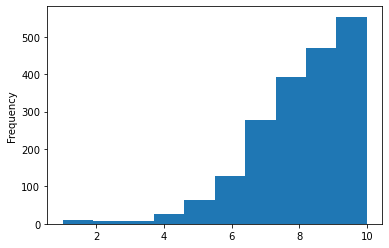

In [33]:
result_discogs["score"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

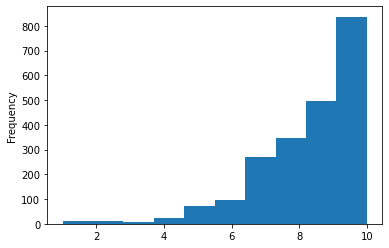

In [119]:
result_discogs_most_wanted["score"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

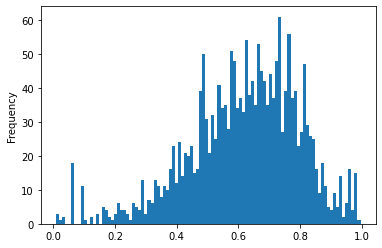

In [121]:
result_discogs["energy"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

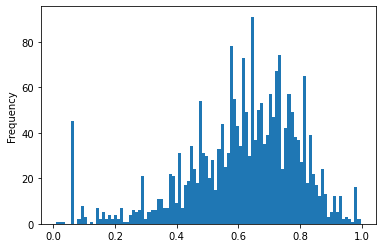

In [122]:
result_discogs_most_wanted["energy"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

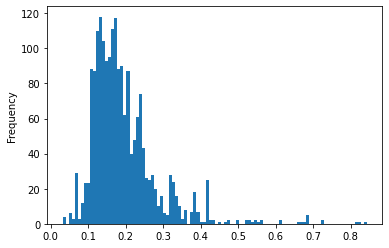

In [123]:
result_discogs["liveness"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

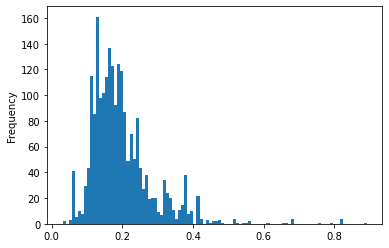

In [124]:
result_discogs_most_wanted["liveness"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

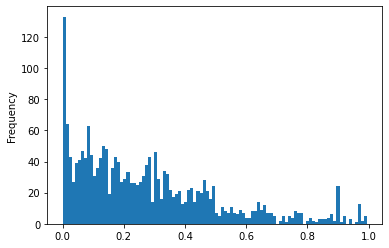

In [125]:
result_discogs["acousticness"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

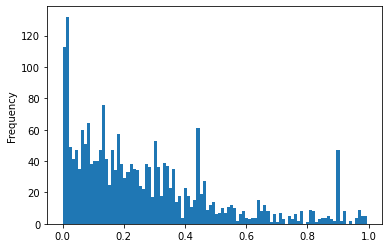

In [126]:
result_discogs_most_wanted["acousticness"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

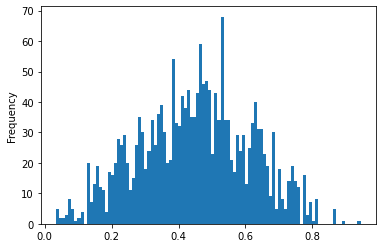

In [128]:
result_discogs["valence"].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

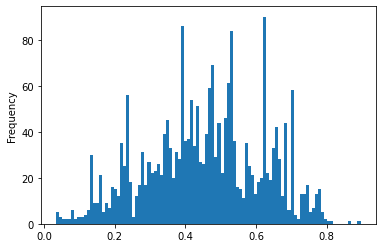

In [127]:
result_discogs_most_wanted["valence"].plot.hist(bins=100)

# Spotify Data

In [37]:
! pip install spotipy

Defaulting to user installation because normal site-packages is not writeable


In [136]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2

SPOTIPY_CLIENT_ID = "0069d7a3ca3e478a8db8eae8d0cbd421"
SPOTIPY_CLIENT_SECRET = "11e330d13ac141a0a0a03a63d5c802f6"


auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)  

In [130]:
def getAlbumAudioFeatures(albumSpotifyUri):
    tracks = sp.album_tracks(albumSpotifyUri)
    album_track_ids = []
    for each in tracks['items']:
        album_track_ids.append(each['uri'])
    album_audio_features = sp.audio_features(album_track_ids)
    output = {}
    output["track_count"] = len(album_track_ids)
    try:
        df_features = pd.DataFrame(album_audio_features)
        output["danceability"] = df_features["danceability"].mean()
        output["energy"] = df_features["energy"].mean()
        output["key"] = df_features["key"].mean()
        output["loudness"] = df_features["loudness"].mean()
        output["liveness"] = df_features["liveness"].mean()
        output["valence"] = df_features["valence"].mean()
        output["acousticness"] = df_features["acousticness"].mean()
        output["speechiness"] = df_features["speechiness"].mean()
        output["instrumentalness"] = df_features["instrumentalness"].mean()
        output["tempo"] = df_features["tempo"].mean()
    except AttributeError:
        print("couldn't fetch audio features for uri : ", albumSpotifyUri)
        output["danceability"] = 0
        output["energy"] = 0
        output["key"] = 0
        output["loudness"] = 0
        output["liveness"] = 0
        output["valence"] = 0
        output["acousticness"] = 0
        output["speechiness"] = 0
        output["instrumentalness"] = 0
        output["tempo"] = 0

    return output

In [59]:
album = "dark side of the moon pink floyd"
res = sp.search(album, type="album", limit=1)

print(res)
resitems = res['albums']['items']
print(type(resitems[0]['uri']))
print(resitems[0]['uri'])

tracks = sp.album_tracks("spotify:album:7xBJ2XXlDFfACXAnOE86t8")
album_track_ids = []
for each in tracks['items']:
    album_track_ids.append(each['uri'])
album_audio_features = sp.audio_features(album_track_ids)
type(album_audio_features)


{'albums': {'href': 'https://api.spotify.com/v1/search?query=dark+side+of+the+moon+pink+floyd&type=album&offset=0&limit=1', 'items': [{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0k17h0D3J5VfsdmQ1iZtE9'}, 'href': 'https://api.spotify.com/v1/artists/0k17h0D3J5VfsdmQ1iZtE9', 'id': '0k17h0D3J5VfsdmQ1iZtE9', 'name': 'Pink Floyd', 'type': 'artist', 'uri': 'spotify:artist:0k17h0D3J5VfsdmQ1iZtE9'}], 'available_markets': ['AE', 'AG', 'AO', 'AR', 'AU', 'BB', 'BD', 'BF', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BZ', 'CA', 'CD', 'CG', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'DJ', 'DM', 'DO', 'EC', 'EG', 'FJ', 'FM', 'GA', 'GD', 'GH', 'GM', 'GN', 'GQ', 'GT', 'GW', 'GY', 'HK', 'HN', 'HT', 'ID', 'IL', 'IN', 'IQ', 'JM', 'JO', 'JP', 'KE', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'LA', 'LB', 'LC', 'LK', 'LR', 'LS', 'LY', 'MG', 'MH', 'ML', 'MO', 'MR', 'MU', 'MV', 'MW', 'MX', 'MY', 'MZ', 'NA', 'NE', 'NG', 'NI', 'NP', 'NR', 'NZ', 'OM', 'PA', 

list

In [135]:
import unidecode
import time
import re

count = 0
skipped = 0
already_filled = 0
for index, row in result_discogs.iterrows():
    count += 1
    if count % 100 == 0:
        print(count, "of missing albums fetched. So far skipped : ", skipped, " already filled : ", already_filled)
        print("Current release : ", row['url'])
    if pd.isnull(row["tempo"]):
        query = re.sub(r'\W+', ' ', unidecode.unidecode(row["title_lower"])) + " " + re.sub(r'\W+', ' ', unidecode.unidecode(row["artist_lower"].replace("(2)","")))
        spotify_search = sp.search(query, type="album", limit=1)
        if len(spotify_search['albums']['items']) < 1:
            #no albums found, skip album
            skipped += 1
            continue
        try:
            spotify_uri = spotify_search['albums']['items'][0]["uri"]
            audio_features = getAlbumAudioFeatures(spotify_uri)

            result_discogs.loc[index, 'danceability'] = audio_features['danceability']
            result_discogs.loc[index, 'energy'] = audio_features['energy']
            result_discogs.loc[index, 'key'] = audio_features['key']
            result_discogs.loc[index, 'loudness'] = audio_features['loudness']
            result_discogs.loc[index, 'liveness'] = audio_features['liveness']
            result_discogs.loc[index, 'valence'] = audio_features['valence']
            result_discogs.loc[index, 'acousticness'] = audio_features['acousticness']
            result_discogs.loc[index, 'speechiness'] = audio_features['speechiness']
            result_discogs.loc[index, 'instrumentalness'] = audio_features['instrumentalness']
            result_discogs.loc[index, 'tempo'] = audio_features['tempo']
        except AttributeError:
            print("failed to fetch audio features for album ". row['url']. " setting all values to 0")
            result_discogs.loc[index, 'danceability'] =0
            result_discogs.loc[index, 'energy'] = 0
            result_discogs.loc[index, 'key'] = 0
            result_discogs.loc[index, 'loudness'] = 0
            result_discogs.loc[index, 'liveness'] = 0
            result_discogs.loc[index, 'valence'] = 0
            result_discogs.loc[index, 'acousticness'] = 0
            result_discogs.loc[index, 'speechiness'] = 0
            result_discogs.loc[index, 'instrumentalness'] = 0
            result_discogs.loc[index, 'tempo'] = 0
    else:
        already_filled += 1
        

print(skipped)
result_discogs

SyntaxError: invalid syntax (1916311916.py, line 35)

In [141]:
import unidecode
import time
import re

count = 0
skipped = 0
already_filled = 0
for index, row in result_discogs_most_wanted.iterrows():
    count += 1
    if count % 100 == 0:
        print(count, "of missing albums fetched. So far skipped : ", skipped, " already filled : ", already_filled)
        print("Current release : ", row['url'])
    if pd.isnull(row["tempo"]):
        query = re.sub(r'\W+', ' ', unidecode.unidecode(row["title_lower"])) + " " + re.sub(r'\W+', ' ', unidecode.unidecode(row["artist_lower"].replace("(2)","")))
        spotify_search = sp.search(query, type="album", limit=1)
        if len(spotify_search['albums']['items']) < 1:
            #no albums found, skip album
            skipped += 1
            continue
        try:
            spotify_uri = spotify_search['albums']['items'][0]["uri"]
            audio_features = getAlbumAudioFeatures(spotify_uri)

            result_discogs_most_wanted.loc[index, 'danceability'] = audio_features['danceability']
            result_discogs_most_wanted.loc[index, 'energy'] = audio_features['energy']
            result_discogs_most_wanted.loc[index, 'key'] = audio_features['key']
            result_discogs_most_wanted.loc[index, 'loudness'] = audio_features['loudness']
            result_discogs_most_wanted.loc[index, 'liveness'] = audio_features['liveness']
            result_discogs_most_wanted.loc[index, 'valence'] = audio_features['valence']
            result_discogs_most_wanted.loc[index, 'acousticness'] = audio_features['acousticness']
            result_discogs_most_wanted.loc[index, 'speechiness'] = audio_features['speechiness']
            result_discogs_most_wanted.loc[index, 'instrumentalness'] = audio_features['instrumentalness']
            result_discogs_most_wanted.loc[index, 'tempo'] = audio_features['tempo']
        except KeyError:
            print("failed to fetch audio features for album ", row['url'], " setting all values to 0")
            result_discogs_most_wanted.loc[index, 'danceability'] =0
            result_discogs_most_wanted.loc[index, 'energy'] = 0
            result_discogs_most_wanted.loc[index, 'key'] = 0
            result_discogs_most_wanted.loc[index, 'loudness'] = 0
            result_discogs_most_wanted.loc[index, 'liveness'] = 0
            result_discogs_most_wanted.loc[index, 'valence'] = 0
            result_discogs_most_wanted.loc[index, 'acousticness'] = 0
            result_discogs_most_wanted.loc[index, 'speechiness'] = 0
            result_discogs_most_wanted.loc[index, 'instrumentalness'] = 0
            result_discogs_most_wanted.loc[index, 'tempo'] = 0
    else:
        already_filled += 1
        

print(skipped)
result_discogs_most_wanted

100 of missing albums fetched. So far skipped :  4  already filled :  95
Current release :  https://www.discogs.com/release/81692-Joy-Division-Closer
200 of missing albums fetched. So far skipped :  6  already filled :  193
Current release :  https://www.discogs.com/release/223754-Eminem-The-Marshall-Mathers-LP
300 of missing albums fetched. So far skipped :  14  already filled :  285
Current release :  https://www.discogs.com/release/395389-Ramp-Come-Into-Knowledge
400 of missing albums fetched. So far skipped :  22  already filled :  377
Current release :  https://www.discogs.com/release/5290712-Daft-Punk-Random-Access-Memories
500 of missing albums fetched. So far skipped :  31  already filled :  468
Current release :  https://www.discogs.com/release/710468-David-Bowie-The-Man-Who-Sold-The-World
600 of missing albums fetched. So far skipped :  40  already filled :  559
Current release :  https://www.discogs.com/release/8635325-Various-Space-Echo-The-Mystery-Behind-The-Cosmic-Sound-O

,most_want_rank,artist_x,title_x,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower,artist_y,title_y,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99,0,random access memories,daft punk,Daft Punk,Random Access Memories,Mark Richardson,8.8,2013.0,May 20 2013,Columbia,Electronic,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077
1,2,Daft Punk,Discovery,https://www.discogs.com/release/2879-Daft-Punk...,2001,2001-03-12,['Electronic'],"['House', 'Disco']",Europe,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,21065,13567,4.60,2845,131.48,16.98,350.00,0,discovery,daft punk,Daft Punk,Discovery,Ryan Schreiber,6.4,2001.0,March 13 2001,Virgin,Electronic,0.671643,0.643857,6.071429,-11.303714,0.100057,0.178870,0.520835,0.177571,0.492071,120.364071
2,3,Wu-Tang Clan,Enter The Wu-Tang (36 Chambers),https://www.discogs.com/release/153749-Wu-Tang...,1993,1993-11-09,['Hip Hop'],"['Hardcore Hip-Hop', 'Boom Bap']",US,"[['vinyl', 'lp', 'album', 'stereo']]",1,0,0,0,0,0,0,2,0,0,20201,13245,4.69,2259,92.99,15.04,475.00,0,enter the wu-tang (36 chambers),wu-tang clan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802867,0.513600,7.666667,-10.751400,0.415000,0.298220,0.001657,0.342080,0.546533,101.478333
3,4,Doom,Madvillainy,https://www.discogs.com/release/242785-Doom-An...,2004,2004-03-19,['Hip Hop'],"['Jazzy Hip-Hop', 'Experimental', 'Leftfield']",US,"[['2 x vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,19881,13137,4.72,2177,76.00,18.90,166.25,0,madvillainy,doom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480000,0.749591,5.818182,-8.702955,0.324564,0.304015,0.071758,0.421714,0.603091,111.435318
4,5,Frank Ocean,Blond,https://www.discogs.com/release/9412062-Frank-...,2016,2016-11-25,"['Hip Hop', 'Funk / Soul', 'Pop']",['Contemporary R&B'],US,"[['2 x vinyl', 'lp', 'album', 'limited edition...",1,1,0,0,0,0,0,1,1,0,5783,12955,4.81,839,665.00,237.50,1347.52,0,blond,frank ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496353,0.392859,5.058824,-11.110588,0.190359,0.718941,0.002042,0.210594,0.441782,109.060588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8450,9794,M.I.A. (2),Matangi,https://www.discogs.com/release/5126620-MIA-Ma...,2013,2013-11-25,"['Electronic', 'Hip Hop', 'Pop']",['Electroclash'],US,"[['2 x vinyl', 'lp', 'album', 'gatefold']]",1,0,0,0,0,0,0,1,1,0,1405,890,4.17,106,33.23,16.14,76.00,0,matangi,m.i.a. (2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671600,0.851333,4.466667,-3.880333,0.132193,0.092945,0.051759,0.184893,0.450200,139.992933
8451,9795,Kate Bush,Hounds Of Love,https://www.discogs.com/release/2404695-Kate-B...,2010,2010-08-16,"['Electronic', 'Rock', 'Pop']","['Pop Rock', 'Synth-pop', 'Art Rock']",US,"[['vinyl', 'lp', 'album', 'limited edition', '...",2,1,0,0,1,0,0,1,0,1,1210,890,4.64,187,93.83,47.49,179.99,0,hounds of love,kate bush,Kate Bush,Hounds of Love,Barry Walters,10.0,1985.0,June 12 2016,EMI,Pop/R&B,0.523833,0.392433,4.666667,-15.414750,0.053358,0.643500,0.070888,0.180742,0.468125,107.353167
8452,9796,Donald Byrd,Byrd In Flight,https://www.discogs.com/release/16836906-Donal...,2021,2021-01-08,['Jazz'],"['Hard Bop', 'Latin Jazz']",US,"[['vinyl', 'lp', 'album', 'reissue', 'stereo',...",2,0,0,0,0,0,0,2,1,0,4076,891,4.72,378,47.49,24.70,68.40,0,byrd in flight,donal

In [60]:
result_discogs

,most_collected_rank,artist_x,title_x,url,year,date,genres,styles,countries,formats,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,price_lowest,price_highest,influential_album,title_lower,artist_lower,artist_y,title_y,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Daft Punk,Random Access Memories,https://www.discogs.com/release/4570366-Daft-P...,2013,2013-05-17,"['Electronic', 'Funk / Soul', 'Pop']","['Disco', 'Funk', 'Synth-pop']","UK, Europe & US","[['2 x vinyl', 'lp', 'album', 'stereo', '180 g...",1,0,0,0,0,0,0,2,0,0,53521,18838,4.56,6337,45.00,21.11,189.99,0,random access memories,daft punk,Daft Punk,Random Access Memories,Mark Richardson,8.8,2013.0,May 20 2013,Columbia,Electronic,0.686462,0.585846,7.538462,-10.704077,0.044315,0.287906,0.373620,0.132877,0.488231,114.471077
1,1,Kendrick Lamar,"Good Kid, M.A.A.d City",https://www.discogs.com/release/3975953-Kendri...,2012,2012-10-22,['Hip Hop'],['Conscious'],US,"[['2 x vinyl', 'lp', 'album', 'deluxe edition']]",1,0,0,0,0,0,0,1,0,0,41176,12493,4.66,2957,20.90,13.29,35.76,0,"good kid, m.a.a.d city",kendrick lamar,Kendrick Lamar,"good kid, m.A.A.d city",Jayson Greene,9.5,2012.0,October 23 2012,Interscope,Rap,0.601294,0.676706,4.529412,-7.811941,0.268318,0.123219,0.000669,0.311412,0.398206,116.045059
2,2,Michael Jackson,Thriller,https://www.discogs.com/release/2911293-Michae...,1982,1982-11-30,"['Funk / Soul', 'Pop']","['Contemporary R&B', 'Disco', 'Soul']",US,"[['vinyl', 'lp', 'album', 'stereo', 'pitman pr...",1,0,0,0,0,0,0,2,1,1,40452,9254,4.48,2744,15.06,4.53,99.99,1,thriller,michael jackson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.727100,0.585233,6.266667,-9.707967,0.349890,0.375693,0.044753,0.296793,0.608980,110.307933
3,3,Pink Floyd,The Dark Side Of The Moon,https://www.discogs.com/release/9287809-Pink-F...,2016,2016-11-04,['Rock'],"['Prog Rock', 'Psychedelic Rock', 'Classic Rock']",Europe,"[['vinyl', 'lp', 'album', 'reissue', 'remaster...",2,0,0,0,0,0,0,2,1,0,38314,3961,4.83,4201,23.62,19.90,33.25,0,the dark side of the moon,pink floyd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383000,0.400450,6.000000,-15.701900,0.058660,0.390310,0.595929,0.237680,0.272830,120.066200
4,4,Fleetwood Mac,Rumours,https://www.discogs.com/release/526351-Fleetwo...,1977,1977,['Rock'],"['Soft Rock', 'Classic Rock']",US,"[['vinyl', 'lp', 'album', 'los angeles pressin...",1,0,0,0,0,0,0,1,0,1,35108,8351,4.50,2713,21.84,2.85,189.05,1,rumours,fleetwood mac,Fleetwood Mac,Rumours,Jessica Hopper,10.0,1977.0,February 8 2013,Rhino,Rock,0.857000,0.812000,10.000000,-7.362000,0.055500,0.084400,0.000000,0.063800,0.684000,106.446000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,9998,Minor Threat,Minor Threat,https://www.discogs.com/release/1267538-Minor-...,1987,1987,['Rock'],"['Hardcore', 'Punk']",US,"[['vinyl', 'lp', 'compilation', 'repress', '$5...",2,0,0,0,0,0,0,1,0,1,2290,532,4.59,160,34.99,13.00,47.50,0,minor threat,minor threat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.294071,0.941286,3.642857,-6.782429,0.097100,0.028782,0.122042,0.312636,0.632857,148.792857
8924,9999,Carole King,Wrap Around Joy,https://www.discogs.com/release/1602932-Carole...,1974,1974,['Rock'],['Pop Rock'],US,"[['vinyl', 'lp', 'album', 'terre haute pressin...",1,0,0,0,0,0,0,1,0,1,2289,82,3.58,111,2.57,0.99,8.00,0,wrap around joy,carole king,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547833,0.452833,3.500000,-13.260250,0.029158,0.099133,0.000132,0.129717,0.650167,119.629833
8925,10000,Tom Jones,This Is Tom Jones,https://www.discogs.com/release/1804019-Tom-Jo...,1969,1969,['Pop'],"['Ballad', 'Vocal']",US,"[['vinyl', 'lp', 'album']]",1,0,0,0,0,0,0,1,0,0,2292,31,3.50,84,2.33,0.93,7.60,0,this is tom jones,tom jo

In [61]:
result_discogs.to_csv("datasets/all_release_data_p4k_spotify_filled_partial.csv")

In [142]:
result_discogs_most_wanted.to_csv("datasets/all_release_data_p4k_spotify_filled_partial_most_wanted.csv")
result_discogs_most_wanted.isnull().sum()

most_want_rank          0
artist_x                0
title_x                 0
url                     0
year                    0
date                    0
genres                  0
styles                  0
countries               0
formats                 0
issue_type              0
limited                 0
picture_disc            0
box_set                 0
numbered                0
test_pressing           0
promo                   0
channels                0
gatefold                0
colored                 0
haves                   0
wants                   0
avg_rating              1
num_ratings             0
price_median            0
price_lowest            0
price_highest           0
influential_album       0
title_lower             0
artist_lower            0
artist_y             6287
title_y              6287
reviewauthor         6287
score                6287
releaseyear          6309
reviewdate           6287
recordlabel          6290
genre                6302
danceability

In [143]:
result_discogs_most_wanted.describe()

,most_want_rank,year,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,influential_album,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.0,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8454.000000,8455.000000,8455.000000,8455.000000,2168.000000,2146.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000
mean,4834.958368,1993.203785,1.226848,0.121348,0.007096,0.0,0.021644,0.000710,0.010763,1.166647,0.124187,0.286458,2513.407096,1475.897102,4.528065,236.062567,109.524363,0.171141,8.297002,1997.195713,0.520756,0.601253,5.319013,-10.231459,0.089236,0.287721,0.230050,0.208642,0.473468,119.192449
std,2823.199809,17.629335,0.418818,0.326551,0.083946,0.0,0.145527,0.026631,0.103191,0.372682,0.329814,0.452133,3551.785957,936.120117,0.191657,296.279131,232.377037,0.376655,1.560387,16.587886,0.143204,0.192567,1.401947,4.360315,0.080365,0.233175,0.256852,0.099771,0.178506,13.445772
min,0.000000,1954.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,890.000000,2.940000,0.000000,4.220000,0.000000,1.000000,1960.000000,0.000000,0.000000,0.000000,-35.675000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2381.500000,1977.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,429.500000,1004.000000,4.420000,68.000000,28.490000,0.000000,7.400000,1984.000000,0.419100,0.482538,4.454545,-12.515411,0.044553,0.102578,0.013534,0.143139,0.341000,111.241679
50%,4821.000000,1993.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1207.000000,1191.000000,4.550000,136.000000,52.780000,0.000000,8.700000,2002.000000,0.509100,0.615364,5.333333,-9.544364,0.058660,0.231828,0.123338,0.189890,0.475342,119.304182
75%,7257.000000,2011.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3139.500000,1557.000000,4.660000,289.000000,114.000000,0.000000,9.500000,2011.000000,0.621637,0.746000,6.100000,-7.128451,0.093777,0.417764,0.363188,0.241775,0.608980,127.509889
max,9798.000000,2022.000000,2.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,53521.000000,18838.000000,5.000000,6337.000000,7019.460000,1.000000,10.000000,2019.000000,0.897000,0.999750,11.000000,0.942625,0.950263,0.994083,0.960000,0.981636,0.975500,200.310000


In [63]:
result_discogs.describe()

,most_collected_rank,year,issue_type,limited,picture_disc,box_set,numbered,test_pressing,promo,channels,gatefold,colored,haves,wants,avg_rating,num_ratings,price_median,influential_album,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.0,8928.000000,8928.0,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.00000,8928.000000,1938.000000,1920.000000,8134.000000,8134.000000,8134.000000,8134.000000,8134.000000,8134.000000,8134.000000,8134.000000,8134.000000,8134.000000
mean,5006.305668,1994.182236,1.236895,0.060036,0.004032,0.0,0.004704,0.0,0.000896,1.277442,0.156026,0.378472,4443.019377,856.557124,4.268753,340.060260,24.09879,0.120520,8.050774,2000.266146,0.515704,0.617270,5.213325,-9.982756,0.072485,0.271921,0.153942,0.225625,0.500722,121.170599
std,2890.076631,18.188995,0.425201,0.237567,0.063375,0.0,0.068430,0.0,0.029922,0.447761,0.362900,0.485033,3002.904261,1061.661935,0.327544,263.646347,34.08650,0.325587,1.541169,16.215282,0.126898,0.181847,1.306391,3.817747,0.067563,0.219062,0.205846,0.140894,0.169432,12.453146
min,0.000000,1955.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,2288.000000,18.000000,3.070000,40.000000,0.95000,0.000000,1.000000,1960.000000,0.000000,0.000000,0.000000,-35.456520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2501.250000,1978.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,2726.750000,260.000000,4.020000,198.000000,8.31750,0.000000,7.200000,1988.000000,0.429800,0.500504,4.400000,-12.349737,0.040606,0.099285,0.006348,0.145218,0.381063,113.727000
50%,5008.500000,1987.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,3419.000000,553.500000,4.320000,267.000000,19.00000,0.000000,8.300000,2006.000000,0.512528,0.627000,5.222222,-9.511900,0.051158,0.221417,0.068492,0.188723,0.508887,120.993000
75%,7515.250000,2014.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2.000000,0.000000,1.000000,4958.500000,1052.000000,4.540000,390.000000,27.84000,0.000000,9.200000,2013.000000,0.599583,0.752909,6.000000,-7.157462,0.074112,0.392433,0.211174,0.249200,0.625217,128.365682
max,10002.000000,2022.000000,2.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,2.000000,1.000000,1.000000,53521.000000,18838.000000,4.900000,6337.000000,1462.50000,1.000000,10.000000,2019.000000,0.905000,0.996667,11.000000,0.942625,0.955000,0.994083,0.986000,0.977500,0.971000,206.779000


In [ ]:
# create training and target variable
train_target = df_discogs[["median_price"]]
train_features = df_discogs[["artist","title","year","date","issue_type","limited","picture_disc","box_set","numbered","test_pressing","promo","gatefold","colored","haves","wants"]]

#log transform target variable
train_target_log = np.log1p(train_target)

In [ ]:
#create matrices for training models

#Train matrix
X_train_input = np.column_stack((year_train_var, open_access_train_var, references_train_var, fields_study_train_var, nb_field_train_var, authors_train_var, nb_authors_train_var, nb_topic_train_var, venue_train_var, tfidf_train_var))
#print(X_train_input.shape)


#Test matrix
X_test_input = np.column_stack((year_test_var, open_access_test_var, references_test_var, fields_study_test_var, nb_field_test_var, authors_test_var, nb_authors_test_var, nb_topic_test_var, venue_test_var, tfidf_test_var))
#print(X_test_input.shape)

In [ ]:
#Model: XGBoost Regressor: hyperparamaters were tuned using a gridsearch on a validation dataset
import xgboost

print('Training XGBoost Regressor.')
xgb_r = xgboost.XGBRegressor(colsample_bytree= 0.5, max_depth= 10, subsample=0.8, objective ='reg:linear', learning_rate= 0.05, reg_lambda=5, n_estimators = 300, seed = 123)
xgb_r.fit(X_train_input, train_target_log)
test_target_pred = np.expm1(xgb_r.predict(X_test_input))